In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
mon_df = pd.read_csv('monthly_expenditures.csv')

In [3]:
df.head()

,musteri,yas,kidem_suresi,egitim,is_durumu,meslek_grubu,tarih,target
0,23b2476c8a,44.0,46.0,5f8ca0f83b,915be3a7a4,44af6626d6,20190601,0
1,5a7e3a7122,39.0,194.0,01a4f2c96c,915be3a7a4,44af6626d6,20190601,0
2,2ec95c7499,38.0,182.0,7e6640bfe0,d36d84f51a,44af6626d6,20190601,0
3,54399dac33,34.0,101.0,5f8ca0f83b,991c4998fb,44af6626d6,20190601,0
4,97a74b2e58,41.0,125.0,7bb291e291,242927d0f5,91ed9c1e18,20190601,0


In [4]:
mon_df.head()

,musteri,sektor,islem_adedi,aylik_toplam_tutar,tarih
0,f6b1f7d2d6,DIJITAL_URUNLR,1,10.0,20190101
1,f6b1f7d2d6,EGL_SPOR_HOBI,2,520.0,20190101
2,f6b1f7d2d6,GIYIM_AKSESUAR,4,1420.0,20190101
3,f6b1f7d2d6,KUYUMCU,1,550.0,20190101
4,f6b1f7d2d6,RESTORAN_CATER,1,90.0,20190101


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   musteri       60000 non-null  object 
 1   yas           60000 non-null  float64
 2   kidem_suresi  60000 non-null  float64
 3   egitim        59697 non-null  object 
 4   is_durumu     59929 non-null  object 
 5   meslek_grubu  38670 non-null  object 
 6   tarih         60000 non-null  int64  
 7   target        60000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [6]:
mon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932144 entries, 0 to 932143
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   musteri             932144 non-null  object 
 1   sektor              932144 non-null  object 
 2   islem_adedi         932144 non-null  int64  
 3   aylik_toplam_tutar  932144 non-null  float64
 4   tarih               932144 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 35.6+ MB


In [10]:
yeni_df = mon_df.pivot_table(index="musteri", columns=["sektor", "tarih"], values=["islem_adedi", "aylik_toplam_tutar"]).fillna(0)

In [23]:
yeni_df.head()

aylik_toplam_tutar                                               \
sektor         BAHCE_CICEKCLK                                                
tarih                20190101 20190201 20190301 20190401 20190501 20190601   
musteri                                                                      
00010d061a                0.0      0.0      0.0      0.0      0.0      0.0   
000142d604                0.0      0.0      0.0      0.0      0.0      0.0   
0001791170                0.0      0.0      0.0      0.0      0.0      0.0   
00022af007                0.0      0.0      0.0      0.0      0.0      0.0   
000239a138                0.0      0.0      0.0      0.0      0.0      0.0   

                                                    ... islem_adedi           \
sektor     BENZIN_YAKIT                             ... TASIMACILIK            
tarih          20190101 20190201 20190301 20190401  ...    20190301 20190401   
musteri                                             ...                        
00010d061a          0.0      0.0      0.0      0.0  ...         0.0      0.0   
000142d604        210.0     60.0      0.0      0.0  ...         1.0      0.0   
0001791170        130.0      0.0   1010.0    200.0  ...         0.0      0.0   
00022af007          0.0      0.0      0.0      0.0  ...         0.0      0.0   
000239a138          0.0      0.0      0.0      0.0  ...         0.0      0.0   

                                                                        \
sektor                       TURIZM_KONAKLM                              
tarih      20190501 20190601       20190101 20190201 20190301 20190401   
musteri                                                                  
00010d061a      0.0      0.0            3.0      0.0      0.0      0.0   
000142d604      0.0      0.0            0.0      0.0      0.0      0.0   
0001791170      0.0      0.0            0.0      0.0      0.0      0.0   
00022af007      0.0      0.0            0.0      0.0      0.0      0.0   
000239a138      0.0      0.0            0.0      0.0      0.0      0.0   

                              
sektor                        
tarih      20190501 20190601  
musteri                       
00010d061a      0.0      0.0  
000142d604      0.0      0.0  
0001791170      0.0      0.0  
00022af007      0.0      0.0  
000239a138      0.0      0.0  

[5 rows x 156 columns]

In [35]:
print('Missing Values : ')
df.isna().sum()

Missing Values : 


musteri             0
yas                 0
kidem_suresi        0
egitim            303
is_durumu          71
meslek_grubu    21330
tarih               0
target              0
dtype: int64

In [36]:
df.iloc[:,4:6][df.iloc[:,4:6]["meslek_grubu"].isna()]["is_durumu"].value_counts()  # hangi is durumu icin kac tane nan var

d36d84f51a    12942
915be3a7a4     3020
51be29729b     2608
eb35a5eb6b     1563
289777e76d      791
991c4998fb      201
b026b8ee68       57
ba7b390fc4       37
242927d0f5       28
f1fcd26d00        7
83a26fc2fd        4
a996720382        1
Name: is_durumu, dtype: int64

# Visualization

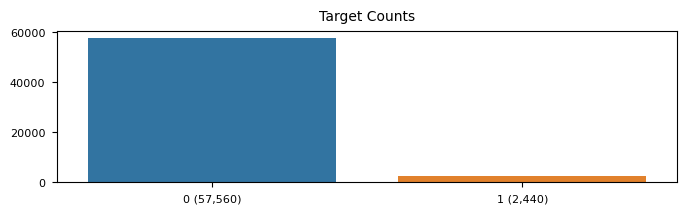

In [32]:
def visualize_target(df):
    
    fig, ax = plt.subplots(figsize=(8, 2), dpi=100)

    sns.barplot(
        x=df['target'].value_counts().index,
        y=df['target'].value_counts().values,
        ax=ax
    )

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([f'{x} ({value_count:,})' for value_count, x in zip(df['target'].value_counts().values, df['target'].value_counts().index)])
    ax.tick_params(axis='x', labelsize=8, pad=5)
    ax.tick_params(axis='y', labelsize=8, pad=5)
    ax.set_title('Target Counts', size=10, pad=8)

    plt.show()


visualize_target(df)

In [33]:
df

,musteri,yas,kidem_suresi,egitim,is_durumu,meslek_grubu,tarih,target
0,23b2476c8a,44.0,46.0,5f8ca0f83b,915be3a7a4,44af6626d6,20190601,0
1,5a7e3a7122,39.0,194.0,01a4f2c96c,915be3a7a4,44af6626d6,20190601,0
2,2ec95c7499,38.0,182.0,7e6640bfe0,d36d84f51a,44af6626d6,20190601,0
3,54399dac33,34.0,101.0,5f8ca0f83b,991c4998fb,44af6626d6,20190601,0
4,97a74b2e58,41.0,125.0,7bb291e291,242927d0f5,91ed9c1e18,20190601,0
...,...,...,...,...,...,...,...,...
59995,b51ec62cf3,20.0,24.0,5f8ca0f83b,51be29729b,NaN,20190601,0
59996,6dc2be5b51,22.0,56.0,7e6640bfe0,d36d84f51a,NaN,20190601,0
59997,a5e7b7632c,41.0,188.0,7e6640bfe0,ba7b390fc4,bfd9cb6270,20190601,0
59998,f79e555824,31.0,143.0,7e6640bfe0,991c4998fb,314826bda8,20190601,0


In [37]:
continuous_columns = ['yas', 'kidem_suresi']
discreated_columns = ['egitim', 'is_durumu', 'meslek_grubu']

Column : yas
Mean: 27.3308  -  Median: 25.0000  -  Std: 7.1088


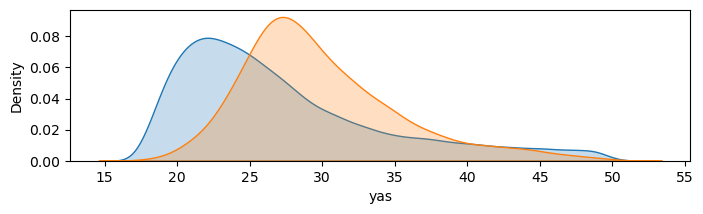


Column : kidem_suresi
Mean: 78.5737  -  Median: 61.0000  -  Std: 64.1243


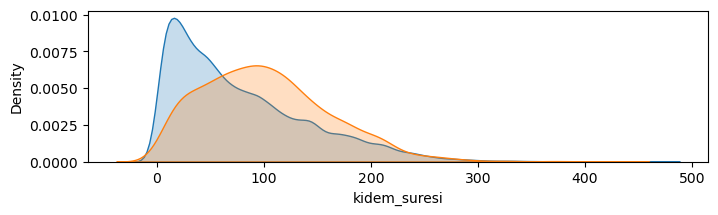

In [44]:
def visualize_continuous_columns(df, columns):
    
    for column in columns:
        print(f'Column : {column}')
        print(f'Mean: {df[column].mean():.4f}  -  Median: {df[column].median():.4f}  -  Std: {df[column].std():.4f}')
        
        fig, ax = plt.subplots(figsize=(8, 2), dpi=100)
        
        sns.kdeplot(df.loc[df['target'] == 0, column], label='Negative', fill=True)
        sns.kdeplot(df.loc[df['target'] == 1, column], label='Positive', fill=True)
        
        plt.show()
        print()

visualize_continuous_columns(df, continuous_columns)

Column : egitim


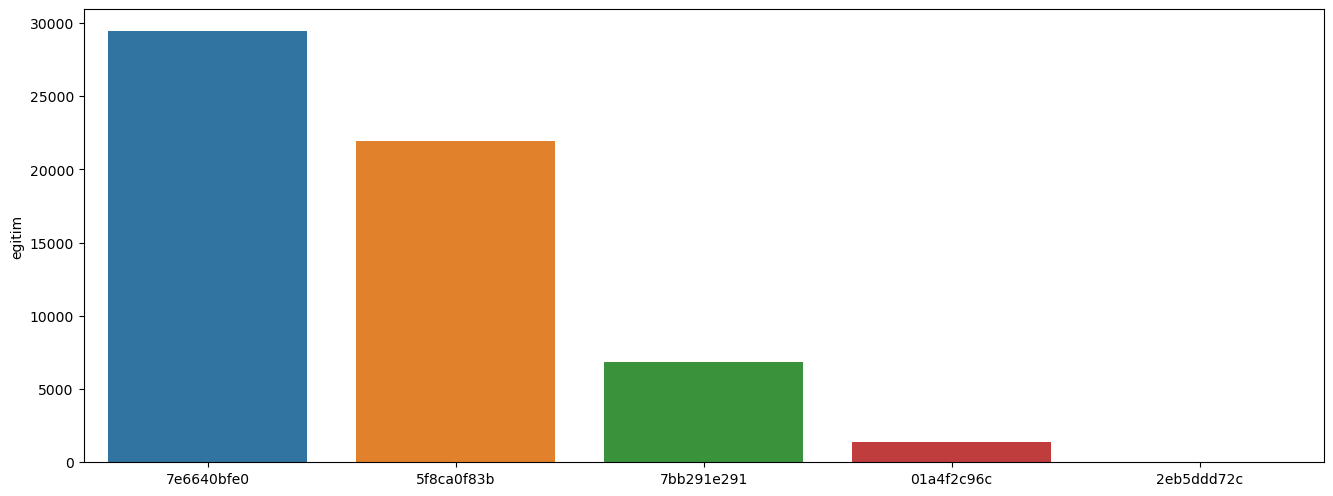


Column : is_durumu


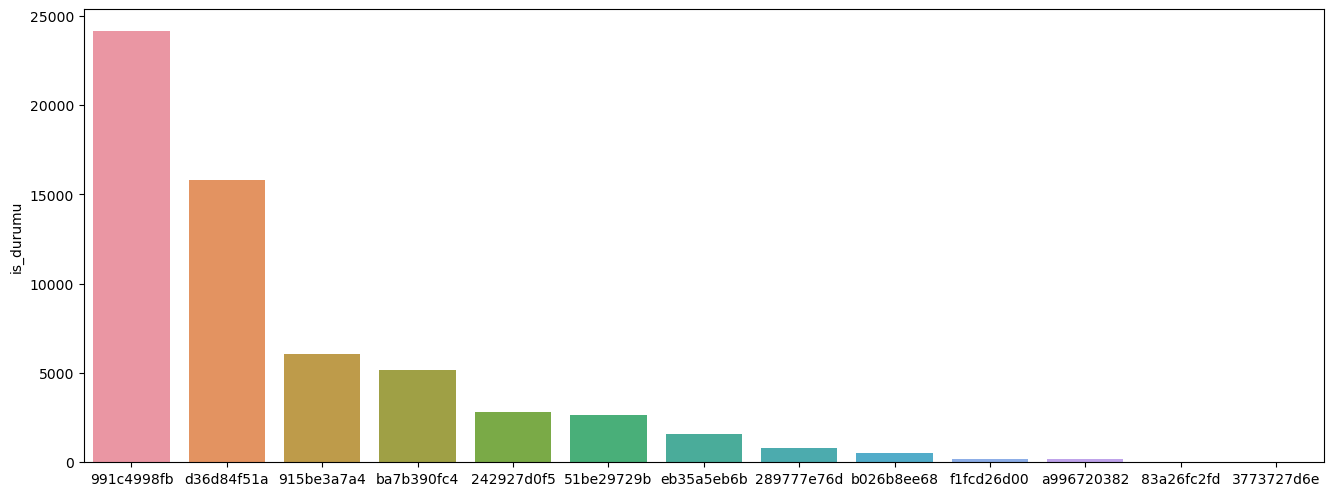


Column : meslek_grubu


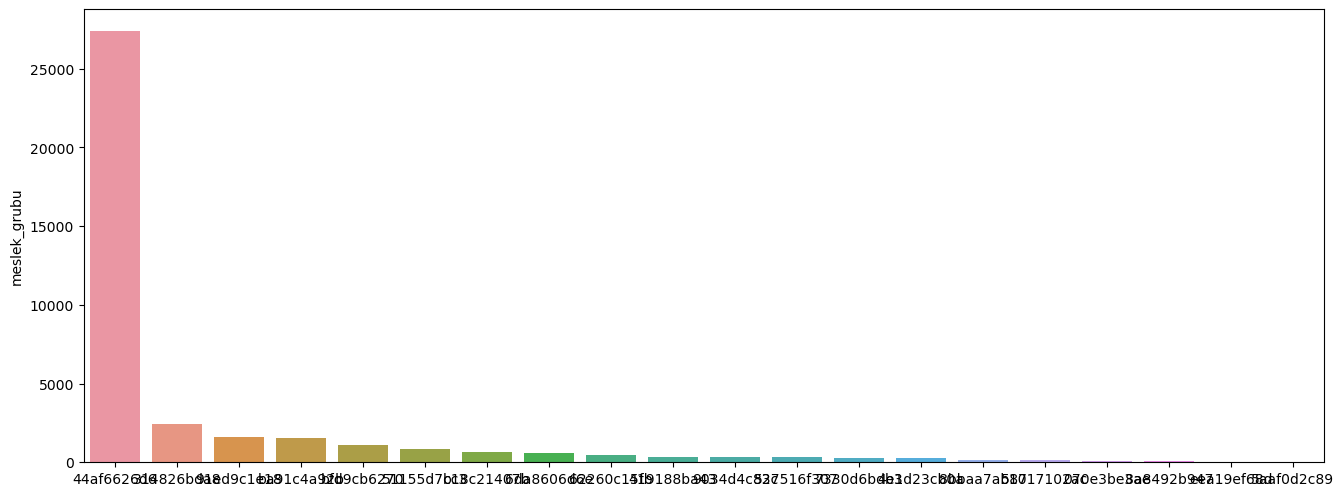

In [51]:
def visualize_discreated_columns(df, columns):
    
    for column in columns:
        print(f'Column : {column}')
        
        fig, ax = plt.subplots(figsize=(16, 6), dpi=100)
        
        sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts())
        
        plt.show()
        print()

visualize_discreated_columns(df, discreated_columns)

In [53]:
df['meslek_grubu'].value_counts()[:5]

44af6626d6    27401
314826bda8     2451
91ed9c1e18     1574
ba91c4a92b     1518
bfd9cb6270     1069
Name: meslek_grubu, dtype: int64

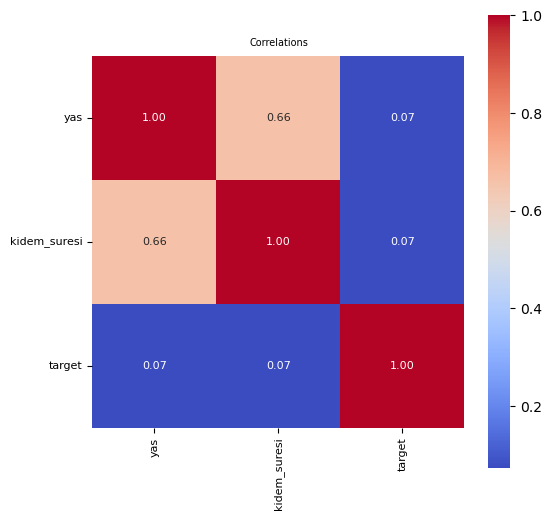

In [74]:
def visualize_correlations(df, columns):

    fig = plt.figure(figsize=(6, 6), dpi=100)
    sns.heatmap(
        df[columns].corr(),
        annot=True,
        square=True,
        cmap='coolwarm',
        annot_kws={'size': 8},
        fmt='.2f'
    )

    plt.tick_params(axis='x', labelsize=8, rotation=90)
    plt.tick_params(axis='y', labelsize=8, rotation=0)
    plt.title('Correlations', size=7, pad=7)

    plt.show()


visualize_correlations(df, ['yas', 'kidem_suresi', 'target'])